In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train = df_train["label"]
X_train = df_train.drop(labels = ["label"], axis = 1)

In [6]:
X_train = X_train / 255.0
test = df_test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [7]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.long)

In [8]:
batch_size = 64
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.layer3 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.layer4(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [10]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
num_epochs = 10
loss_values = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            loss_values.append(loss.item())
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/10], Step [100/657], Loss: 0.2317
Epoch [1/10], Step [200/657], Loss: 0.0609
Epoch [1/10], Step [300/657], Loss: 0.1358
Epoch [1/10], Step [400/657], Loss: 0.0918
Epoch [1/10], Step [500/657], Loss: 0.2297
Epoch [1/10], Step [600/657], Loss: 0.1563
Epoch [2/10], Step [100/657], Loss: 0.0198
Epoch [2/10], Step [200/657], Loss: 0.0789
Epoch [2/10], Step [300/657], Loss: 0.0525
Epoch [2/10], Step [400/657], Loss: 0.0038
Epoch [2/10], Step [500/657], Loss: 0.0271
Epoch [2/10], Step [600/657], Loss: 0.0152
Epoch [3/10], Step [100/657], Loss: 0.0031
Epoch [3/10], Step [200/657], Loss: 0.0373
Epoch [3/10], Step [300/657], Loss: 0.0085
Epoch [3/10], Step [400/657], Loss: 0.1116
Epoch [3/10], Step [500/657], Loss: 0.0289
Epoch [3/10], Step [600/657], Loss: 0.0794
Epoch [4/10], Step [100/657], Loss: 0.0136
Epoch [4/10], Step [200/657], Loss: 0.0056
Epoch [4/10], Step [300/657], Loss: 0.0025
Epoch [4/10], Step [400/657], Loss: 0.0286
Epoch [4/10], Step [500/657], Loss: 0.0023
Epoch [4/10

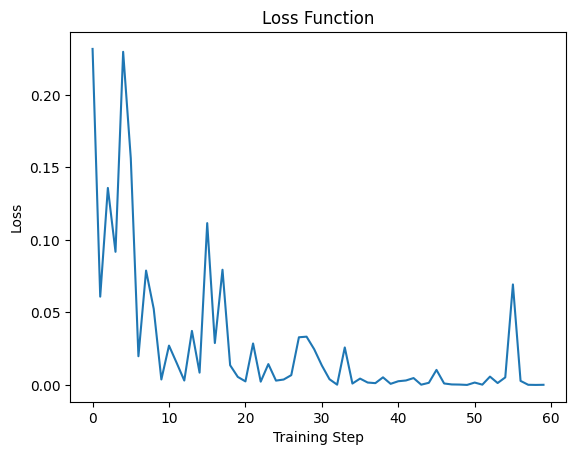

In [12]:
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

In [13]:
X_test = torch.tensor(test, dtype=torch.float32)

test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()

predictions = []
with torch.no_grad():
    for images in test_loader:
        outputs = model(images[0])
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())

submission = pd.DataFrame({"ImageId": list(range(1, len(predictions)+1)), "Label": predictions})

submission.to_csv("submission.csv", index=False)